In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def reader(n):
    df = pd.read_csv("expenses.csv")

    try:
        refill_index = df[df["Date"] == "Refill" ].index[-n]
        df = df.loc[refill_index + 1 :]
    except:
        pass
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(int)
    df["Not Me"] = df["Not Me"].astype(int)
    return df

df = reader(1)
df

,Date,Amount,Item,Category,Split,Not Me
102,2024-05-19,2230,milk,utility,1,0
103,2024-05-20,115,petrol,travel,1,0
104,2024-05-22,25,maggie,food,1,1
105,2024-05-22,80,honey-chilli,food,2,0
106,2024-05-22,20,fruitchill,food,1,1
107,2024-05-23,15,coffee,food,1,1
108,2024-05-23,52,snacks,food,2,0
109,2024-05-24,1000,escape-room,me,2,0
110,2024-05-24,114,taco-bell,food,2,0
111,2024-05-24,200,petrol,travel,2,0


## total spend

In [2]:
def total_spent(df):
    return df["Amount"].sum()

a = total_spent(df)
a

4051

# top spends

In [3]:
df.sort_values(by="Amount", ascending=False)

,Date,Amount,Item,Category,Split,Not Me
102,2024-05-19,2230,milk,utility,1,0
109,2024-05-24,1000,escape-room,me,2,0
111,2024-05-24,200,petrol,travel,2,0
112,2024-05-25,200,petrol,travel,1,0
103,2024-05-20,115,petrol,travel,1,0
110,2024-05-24,114,taco-bell,food,2,0
105,2024-05-22,80,honey-chilli,food,2,0
108,2024-05-23,52,snacks,food,2,0
104,2024-05-22,25,maggie,food,1,1
106,2024-05-22,20,fruitchill,food,1,1


## categorical

In [4]:
def categorical(df):
    d = df[["Category", "Amount", "Split", "Not Me"]]
    d = d.drop(d[d["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    d.drop(["Split", "Not Me"], axis=1, inplace=True)
    d = d.groupby("Category").sum()
    return d

d = categorical(df)
d

,Amount
Category,
food,123.0
me,500.0
travel,415.0
utility,2230.0


## plot

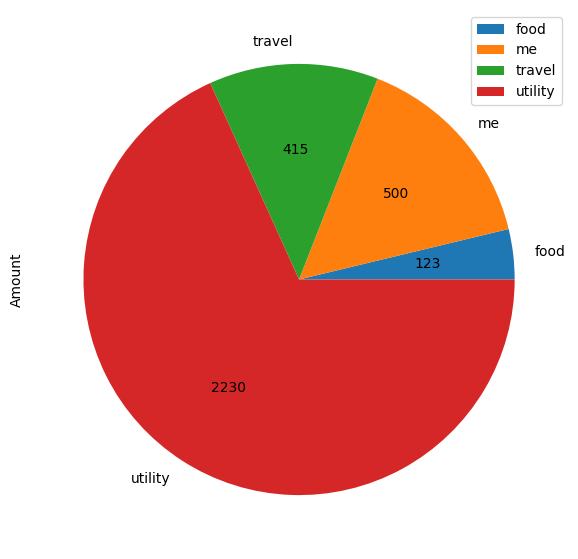

In [5]:
def absolute_value(val):
    return int(round(val / 100.0 * d["Amount"].sum()))

plt.figure(figsize=(7, 7))
d["Amount"].plot(kind="pie", autopct=absolute_value, legend=True)
plt.show()

## date wise

In [6]:
d = df[["Date", "Amount"]].groupby("Date").sum()
d

,Amount
Date,
2024-05-19,2230
2024-05-20,115
2024-05-22,125
2024-05-23,67
2024-05-24,1314
2024-05-25,200


## plot


<Axes: xlabel='Date'>

<Figure size 900x900 with 0 Axes>

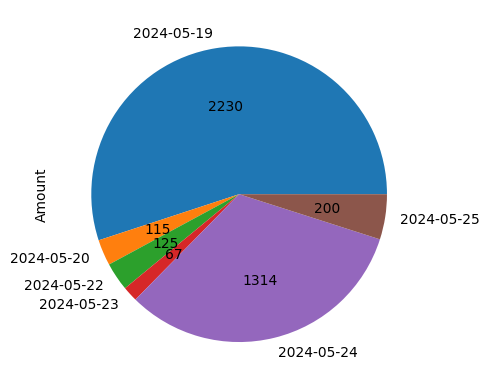

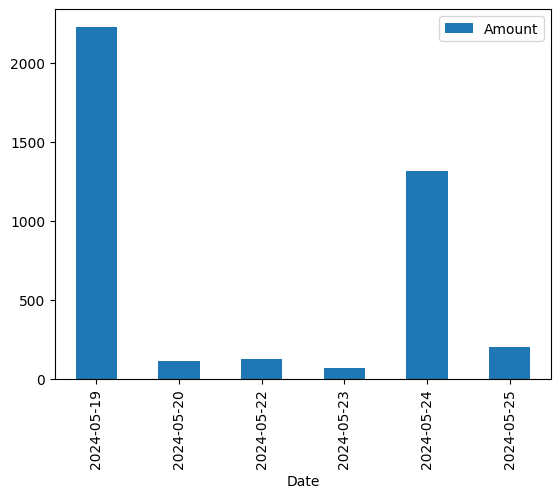

In [7]:
plt.figure(figsize=(9, 9))
d.plot(kind="pie", y="Amount", autopct=absolute_value, legend=False)
d.plot(kind="bar")


## owed

In [8]:
d = df[["Amount", "Split", "Not Me"]]
s = d[d["Not Me"] == 1]
d = d.drop(s.index)
sum1 = s["Amount"].sum()
sum2 = (d["Amount"] - (d["Amount"] / d["Split"])).sum()
print(sum1 + sum2)

783.0


## No of refills ago

In [9]:
def no_of_refills_ago(n):
    df = pd.read_csv("expenses.csv")
    refill_index = df[df["Date"] == "Refill"].index[-(n)]
    try:
        refill_index2 = df[df["Date"] == "Refill"].index[-(n + 1)]
    except:
        refill_index2 = 0
    df = df.loc[refill_index2 + 1: refill_index - 1]
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(float)
    df["Not Me"] = df["Not Me"].astype(int)
    return categorical(df)

e = no_of_refills_ago(1)
e

,Amount
Category,
food,1039.0
travel,1130.0
utility,2211.0


## common items

In [10]:
import pandas as pd
def most_common_item():
    df = pd.read_csv("expenses.csv")
    a = df["Item"].value_counts()
    print(a)
most_common_item()

Item
vegetables      11
petrol          10
milk             6
fruitchill       5
honey-chilli     5
tea              4
chocolate        4
maggie           4
ocean            4
juice            4
curd             3
breakfast        3
refill           3
oreo             3
chocos           2
mogu-mogu        2
recharge         2
fruitpop         2
flowers          2
brindavan        2
haircut          2
auto             1
dosa             1
entry            1
ice-cream        1
pen              1
ration           1
food             1
paneer           1
grocery          1
pizza            1
coffee           1
snacks           1
escape-room      1
shake            1
pasta            1
m                1
gonemad          1
Gatorade         1
vegetable        1
tamarind         1
frappe           1
sabeena          1
oreo-shake       1
stationery       1
vada             1
advance          1
cake             1
rasna            1
brownie          1
taco-bell        1
Name: count, dtype: int64


# All time

In [11]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
y = df[df["Not Me"] == 0]
x = y["Amount"] / y["Split"]
x.sum()


14251.5